In [2]:
import cv2
import albumentations as A
import torch
import torchvision
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset
from glob import *
import os
import random
import numpy as np

In [79]:
path ='/media/data2/rjsdn/zoom/t_100_split/'

In [80]:
# imgs = [y for y in glob(os.path.join(x[0],'*.jpg')) for x in os.walk(path)]
imgs = [y for x in os.walk(path) for y in sorted(glob(os.path.join(x[0],'*.jpg'))+glob(os.path.join(x[0],'*.png')))]

In [5]:
transform = T.Compose([
    T.ToPILImage(),
    T.GaussianBlur(3),
    T.RandomHorizontalFlip(p=1),
    T.ColorJitter(brightness=[1.5,1.5])
])

In [6]:
num=100

In [7]:
fake_dir=['fake/'+x for x in os.listdir(path+'fake')]
real_dir=['real/'+x for x in os.listdir(path+'real')]

In [7]:
# random.shuffle(fake_dir)
# random.shuffle(real_dir)

# Fake

In [10]:
for x in fake_dir[:num]:
    mid_path = os.path.join(path,x)
    b_val = np.random.choice([1,-1],1).item()*random.randrange(1,7)/10 + 1
    for y in os.listdir(mid_path):
        
        y = mid_path +'/'+ y
        img = cv2.imread(y)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        
        transform = T.Compose([
            T.ToPILImage(),
            T.GaussianBlur(7),
            T.RandomHorizontalFlip(p=1),
            T.ColorJitter(brightness=[b_val,b_val])
        ])
        
        sp = y.split('/')
        sp[-4]='train_100_aug'
        save_dir = '/'.join(sp[:-1])
        
        os.makedirs(save_dir,exist_ok=True)
        
        save = '/'.join(sp)
        
        img = transform(img)
        img.save(save,'jpeg')
        
        

# Real

In [8]:
for x in real_dir[:num]:
    mid_path = os.path.join(path,x)
    b_val = np.random.choice([1,-1],1).item()*random.randrange(1,7)/10 + 1

    for y in os.listdir(mid_path):
        
        y = mid_path +'/'+ y
        img = cv2.imread(y)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        
        transform = T.Compose([
            T.ToPILImage(),
            T.GaussianBlur(7),
            T.RandomHorizontalFlip(p=1),
            T.ColorJitter(brightness=[b_val,b_val])
        ])
        
        sp = y.split('/')
        sp[-4]='train_100_aug'
        save_dir = '/'.join(sp[:-1])
        
        os.makedirs(save_dir,exist_ok=True)
        
        save = '/'.join(sp)
        
        img = transform(img)
        img.save(save,'jpeg')
        
        

# TEST

In [17]:
fpath ='/media/data2/rjsdn/zoom/dataset/train_100/fake/'
for x in os.listdir(fpath):
    save = x[:-8]
    p1 = os.path.join(fpath,save)
    p2 = os.path.join(fpath,x)
    os.rename(p2,p1)

In [14]:
p1,p2

('/media/data2/rjsdn/zoom/dataset/train_100/fake/00016_aug_aug',
 '/media/data2/rjsdn/zoom/dataset/train_100/fake/00016_aug')

# Compression

In [81]:
import matplotlib.pyplot as plt

In [82]:
tf = A.Compose([
    A.ImageCompression(10,10,always_apply=True)
])

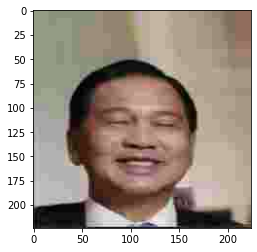

In [83]:
x = cv2.imread(imgs[0])
x = cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
x = tf(image=x)['image']
plt.imshow(x)

In [88]:
save

'/media/data2/rjsdn/zoom/t_100_split/t_100_comp/031/106.jpg'

In [92]:
for i in range(1,2):
    path =f'/media/data2/rjsdn/zoom/dataset/train6/'
    imgs = [y for x in os.walk(path) for y in sorted(glob(os.path.join(x[0],'*.jpg'))+glob(os.path.join(x[0],'*.png')))]
    for x in imgs:
        img = cv2.imread(x)
        img = tf(image=img)['image']

        save = x.split('/')
#         print(save)
#         save[-3]='t_100_comp'
        save.insert(-4,'compression')
        os.makedirs('/'.join(save[:-1]),exist_ok=True)
        save = '/'.join(save)
#         break
        cv2.imwrite(save,img)

In [93]:
for i in range(1,2):
    path =f'/media/data2/rjsdn/zoom/dataset/test6/'
    imgs = [y for x in os.walk(path) for y in sorted(glob(os.path.join(x[0],'*.jpg'))+glob(os.path.join(x[0],'*.png')))]
    for x in imgs:
        img = cv2.imread(x)
        img = tf(image=img)['image']

        save = x.split('/')
        save.insert(-4,'compression')
        os.makedirs('/'.join(save[:-1]),exist_ok=True)
        save = '/'.join(save)

        cv2.imwrite(save,img)

In [77]:
for i in range(1,6):
    path =f'/media/data2/rjsdn/zoom/dataset/train{i}/'
    imgs = [y for x in os.walk(path) for y in sorted(glob(os.path.join(x[0],'*.jpg'))+glob(os.path.join(x[0],'*.png')))]
    for x in imgs:
        img = cv2.imread(x)
        img = tf(image=img)['image']

        save = x.split('/')
        save.insert(-4,'compression')
        os.makedirs('/'.join(save[:-1]),exist_ok=True)
        save = '/'.join(save)

        cv2.imwrite(save,img)

In [78]:
for i in range(1,2):
    path =f'/media/data2/rjsdn/zoom/dataset/val/'
    imgs = [y for x in os.walk(path) for y in sorted(glob(os.path.join(x[0],'*.jpg'))+glob(os.path.join(x[0],'*.png')))]
    for x in imgs:
        img = cv2.imread(x)
        img = tf(image=img)['image']

        save = x.split('/')
        save.insert(-4,'compression')
        os.makedirs('/'.join(save[:-1]),exist_ok=True)
        save = '/'.join(save)

        cv2.imwrite(save,img)